## Simulate dice rolls - show histograms and compare to theory

Theoretical probability for rolling two dice:

$S=\{(1,1),(1,2),...,(6,6)\}$

Total outcomes $=6\times6=36$

Event $E$ = Sum is 7
$E=\{(1,6),(2,5),(3,4),(4,3),(5,2),(6,1)\}$

$P(sum=7)=\frac{6}{36}=\frac{1}{6}\approx0.1667$

In [1]:
import random
import itertools
import collections
import math
import numpy as np
import matplotlib.pyplot as plt

# Test random integer generation
random.randint(1, 5)

4

In [2]:
# Simple simulation with a small number of trials
n_trials = 100 # try increasing this to 100000 or 1000000
count_sum7 = 0

for i in range(n_trials):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        count_sum7 += 1

prob_estimate = count_sum7 / n_trials
print(f"Estimated P(sum=7): {prob_estimate}")

Estimated P(sum=7): 0.14


Each **trial** = one simulated experiment (like rolling two dice once).

The more trials you run, the closer your simulated probability will get to the theoretical value (**Law of Large Numbers**).

"Better convergence" means the random error decreases as trials increase.

In [3]:
N_TRIALS = 100_000 # number of Monte Carlo trials (increase for better convergence)

def simulate_dice(n_dice=2, sides=6, n_trials=N_TRIALS):
    sums = [sum(random.randint(1, sides) for i in range(n_dice)) for _ in range(n_trials)]
    return sums

dice_sums = simulate_dice(n_dice=2, sides=6)

# Theoretical distribution for two fair dice
outcomes = list(itertools.product(range(1, 7), repeat=2))
counts = collections.Counter(sum(o) for o in outcomes)
total_outcomes = len(outcomes)

# --- Event 1: P(sum == 7) ---
emp_p_sum7 = sum(1 for s in dice_sums if s == 7) / N_TRIALS
theo_p_sum7 = counts[7] / total_outcomes
print(f"DICE: Empirical P(sum==7)={emp_p_sum7:.5f}, Theoretical={theo_p_sum7:.5f}")

# --- Event 2: P(sum == 2) ---
emp_p_sum2 = sum(1 for s in dice_sums if s == 2) / N_TRIALS
theo_p_sum2 = counts[2] / total_outcomes
print(f"DICE: Empirical P(sum==2)={emp_p_sum2:.5f}, Theoretical={theo_p_sum2:.5f}")

# --- Event 3: P(sum > 9) ---
emp_p_sum_gt9 = sum(1 for s in dice_sums if s > 9) / N_TRIALS
theo_p_sum_gt9 = (counts[10] + counts[11] + counts[12]) / total_outcomes
print(f"DICE: Empirical P(sum>9)={emp_p_sum_gt9:.5f}, Theoretical={theo_p_sum_gt9:.5f}")

DICE: Empirical P(sum==7)=0.16754, Theoretical=0.16667
DICE: Empirical P(sum==2)=0.02816, Theoretical=0.02778
DICE: Empirical P(sum>9)=0.16765, Theoretical=0.16667


### Histogram: distribution of sums (2..12)

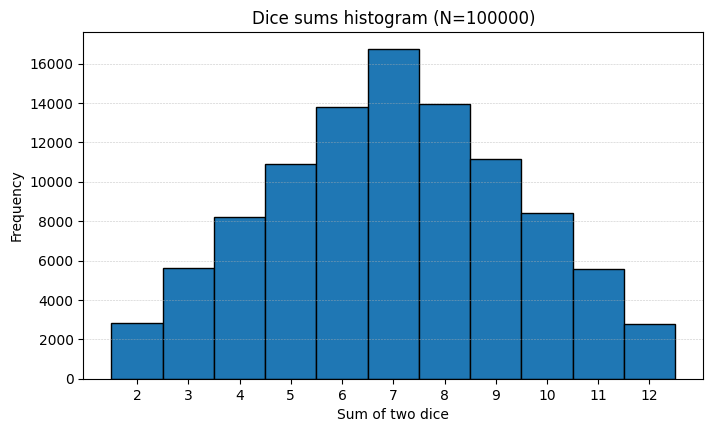

In [4]:
plt.figure(figsize=(8, 4.5))
bins = np.arange(1.5, 12.6, 1) # center bins on integers 2..12
plt.hist(dice_sums, bins=bins, edgecolor='black')
plt.xticks(range(2, 13))
plt.xlabel("Sum of two dice")
plt.ylabel("Frequency")
plt.title(f"Dice sums histogram (N={N_TRIALS})")
plt.grid(axis='y', linestyle='--', linewidth=0.4, alpha=0.7)
plt.show()

## Simulate coin tosses- show histograms and compare to theory

In [5]:
def simulate_coins(n_tosses=3, p_head=0.5, n_trials=N_TRIALS):
    heads_counts = [sum(1 if random.random() < p_head else 0 for i in range(n_tosses)) for _ in range(n_trials)]
    return heads_counts

coin_heads = simulate_coins(n_tosses=3, p_head=0.5)

In [6]:
# --- Event 1: P(at least one head) ---
emp_p_at_least_one_head = sum(1 for h in coin_heads if h >= 1) / N_TRIALS
theo_p_at_least_one_head = 1 - (1 - 0.5)**3 # 1 - P(no heads) = 1 - (1/2)^3
print(f"COINS: Empirical P(at least one head in 3 tosses)={emp_p_at_least_one_head:.5f}, Theoretical={theo_p_at_least_one_head:.5f}")

# --- Event 2: P(exactly 0 heads) ---
emp_p_zero_heads = sum(1 for h in coin_heads if h == 0) / N_TRIALS
theo_p_zero_heads = (0.5)**3 # P(TTT)
print(f"COINS: Empirical P(zero heads)={emp_p_zero_heads:.5f}, Theoretical={theo_p_zero_heads:.5f}")

# --- Event 3: P(exactly 2 heads) ---
emp_p_two_heads = sum(1 for h in coin_heads if h == 2) / N_TRIALS
theo_p_two_heads = 3 * (0.5)**2 * (0.5)**1 # C(3, 2) * p^2 * (1-p)^1
print(f"COINS: Empirical P(two heads)={emp_p_two_heads:.5f}, Theoretical={theo_p_two_heads:.5f}")

COINS: Empirical P(at least one head in 3 tosses)=0.87504, Theoretical=0.87500
COINS: Empirical P(zero heads)=0.12496, Theoretical=0.12500
COINS: Empirical P(two heads)=0.37444, Theoretical=0.37500


### Histogram: counts of number of heads (0..3)

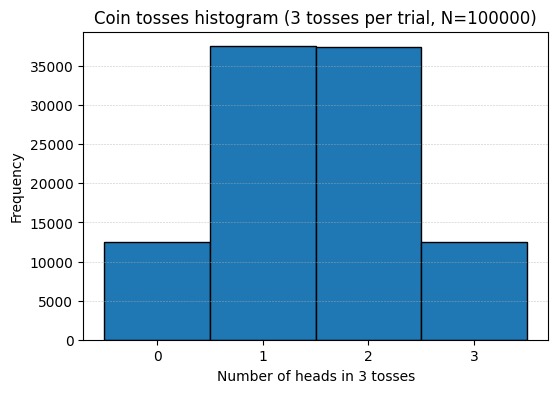

In [7]:
plt.figure(figsize=(6, 4))
plt.hist(coin_heads, bins=np.arange(-0.5, 4.5, 1), edgecolor='black')
plt.xticks([0, 1, 2, 3])
plt.xlabel("Number of heads in 3 tosses")
plt.ylabel("Frequency")
plt.title(f"Coin tosses histogram (3 tosses per trial, N={N_TRIALS})")
plt.grid(axis='y', linestyle='--', linewidth=0.4, alpha=0.7)
plt.show()

## Simulate card draws - show histograms and compare to theory

In [8]:
# Cards: one draw from standard 52-card deck (no replacement)
ranks = ['A'] + [str(i) for i in range(2, 11)] + ['J', 'Q', 'K']
suits = ['H', 'D', 'C', 'S']

deck = [(r, s) for r in ranks for s in suits]

print(ranks)
print(suits)
print(deck)
print(len(deck))

['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
['H', 'D', 'C', 'S']
[('A', 'H'), ('A', 'D'), ('A', 'C'), ('A', 'S'), ('2', 'H'), ('2', 'D'), ('2', 'C'), ('2', 'S'), ('3', 'H'), ('3', 'D'), ('3', 'C'), ('3', 'S'), ('4', 'H'), ('4', 'D'), ('4', 'C'), ('4', 'S'), ('5', 'H'), ('5', 'D'), ('5', 'C'), ('5', 'S'), ('6', 'H'), ('6', 'D'), ('6', 'C'), ('6', 'S'), ('7', 'H'), ('7', 'D'), ('7', 'C'), ('7', 'S'), ('8', 'H'), ('8', 'D'), ('8', 'C'), ('8', 'S'), ('9', 'H'), ('9', 'D'), ('9', 'C'), ('9', 'S'), ('10', 'H'), ('10', 'D'), ('10', 'C'), ('10', 'S'), ('J', 'H'), ('J', 'D'), ('J', 'C'), ('J', 'S'), ('Q', 'H'), ('Q', 'D'), ('Q', 'C'), ('Q', 'S'), ('K', 'H'), ('K', 'D'), ('K', 'C'), ('K', 'S')]
52


In [9]:
def simulate_cards(n_draws=1, with_replacement=True, n_trials=N_TRIALS):
    draws = []
    for i in range(n_trials):
        if with_replacement:
            drawn = tuple(random.choice(deck) for j in range(n_draws))
        else:
            drawn = tuple(random.sample(deck, k=n_draws))
        draws.append(drawn)
    return draws

card_draws = simulate_cards(n_draws=1, with_replacement=True) # with replacement
len(card_draws)

100000

In [10]:
# --- Event 1: drawn card is an Ace or a Heart ---
def is_ace_or_heart(draw):
    # draw is a tuple of (rank, suit) pairs
    for r, s in draw:
        if r == 'A' or s == 'H':
            return True
    return False

emp_p_ace_or_heart = sum(1 for d in card_draws if is_ace_or_heart(d)) / N_TRIALS
# Theoretical: P(Ace) + P(Heart) - P(Ace and Heart) = 4/52 + 13/52 - 1/52 = 16/52
theo_p_ace_or_heart = 16 / 52
print(f"CARDS: Empirical P(Ace or Heart)={emp_p_ace_or_heart:.5f}, Theoretical={theo_p_ace_or_heart:.5f}")

# --- Event 2: drawn card is a Face Card (J, Q, K) ---
def is_face_card(draw):
    for r, s in draw:
        if r in ['J', 'Q', 'K']:
            return True
    return False

emp_p_face_card = sum(1 for d in card_draws if is_face_card(d)) / N_TRIALS
theo_p_face_card = 12 / 52 # 3 face cards (J,Q,K) * 4 suits
print(f"CARDS: Empirical P(Face Card)={emp_p_face_card:.5f}, Theoretical={theo_p_face_card:.5f}")

# --- Event 3: drawn card is Red (H, D) ---
def is_red_card(draw):
    for r, s in draw:
        if s in ['H', 'D']:
            return True
    return False

emp_p_red_card = sum(1 for d in card_draws if is_red_card(d)) / N_TRIALS
theo_p_red_card = 26 / 52 # 13 Hearts + 13 Diamonds
print(f"CARDS: Empirical P(Red Card)={emp_p_red_card:.5f}, Theoretical={theo_p_red_card:.5f}")

CARDS: Empirical P(Ace or Heart)=0.30734, Theoretical=0.30769
CARDS: Empirical P(Face Card)=0.23133, Theoretical=0.23077
CARDS: Empirical P(Red Card)=0.50139, Theoretical=0.50000


### Histogram: suit frequencies from single-draw simulation

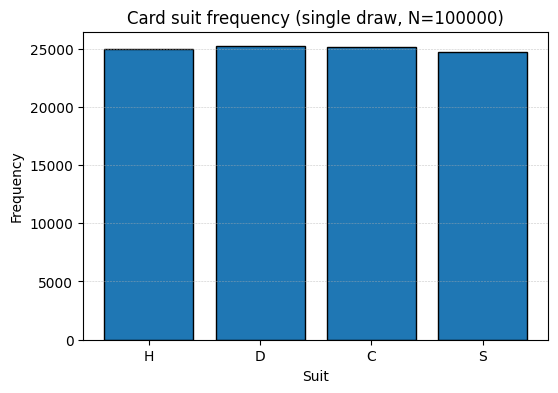

In [11]:
suit_counts = collections.Counter(d[0][1] for d in card_draws) # d[0][1] is the suit of the first (only) card
suits_order = ['H', 'D', 'C', 'S']
counts_list = [suit_counts[s] for s in suits_order]

plt.figure(figsize=(6, 4))
plt.bar(suits_order, counts_list, edgecolor='black')
plt.xlabel("Suit")
plt.ylabel("Frequency")
plt.title(f"Card suit frequency (single draw, N={N_TRIALS})")
plt.grid(axis='y', linestyle='--', linewidth=0.4, alpha=0.7)
plt.show()

## Summary printed in a compact table

In [12]:
print("\nSummary (theoretical vs empirical):\n")
print(f"{'Event':<30} {'Theoretical':<15} {'Empirical':<15}")
print("-"*60)
print(f"{'Two dice: sum == 7':<30} {theo_p_sum7:<15.5f} {emp_p_sum7:<15.5f}")
print(f"{'Two dice: sum == 2':<30} {theo_p_sum2:<15.5f} {emp_p_sum2:<15.5f}")
print(f"{'Two dice: sum > 9':<30} {theo_p_sum_gt9:<15.5f} {emp_p_sum_gt9:<15.5f}")
print(f"{'Three coins: at least one Head':<30} {theo_p_at_least_one_head:<15.5f} {emp_p_at_least_one_head:<15.5f}")
print(f"{'Three coins: zero Heads':<30} {theo_p_zero_heads:<15.5f} {emp_p_zero_heads:<15.5f}")
print(f"{'Three coins: two Heads':<30} {theo_p_two_heads:<15.5f} {emp_p_two_heads:<15.5f}")
print(f"{'One card: Ace or Heart':<30} {theo_p_ace_or_heart:<15.5f} {emp_p_ace_or_heart:<15.5f}")
print(f"{'One card: Face Card':<30} {theo_p_face_card:<15.5f} {emp_p_face_card:<15.5f}")
print(f"{'One card: Red Card':<30} {theo_p_red_card:<15.5f} {emp_p_red_card:<15.5f}")


Summary (theoretical vs empirical):

Event                          Theoretical     Empirical      
------------------------------------------------------------
Two dice: sum == 7             0.16667         0.16754        
Two dice: sum == 2             0.02778         0.02816        
Two dice: sum > 9              0.16667         0.16765        
Three coins: at least one Head 0.87500         0.87504        
Three coins: zero Heads        0.12500         0.12496        
Three coins: two Heads         0.37500         0.37444        
One card: Ace or Heart         0.30769         0.30734        
One card: Face Card            0.23077         0.23133        
One card: Red Card             0.50000         0.50139        
